## important notes
- currently, using solar radiation intensity at 1 a.u. constant
    - while this is correct, we should rederive in our paper how this is calculated

In [195]:
import numpy as np 
import matplotlib.pyplot as mp

In [196]:
### important constants
# used for stefan-boltzman calculations
SIGMA = 5.67e-8 # W / m^2 / k
EPSILON = 1.0 # we are modeling as a "worst case" blackbody habitat
SOLAR_INTENSITY = 1320 # W / m^2
AIR_DENSITY = 1.225 # kg / m^3 
CP_AIR = 1004 # J / kg / k
SPACE_TEMP = 3 # K 

#### thermals stuff

In [197]:
def point_source_heating(absorptivity, area, intensity):
    
    return absorptivity * area * intensity

def radiative_cooling(absorptivity, area, surface_temperature):
    return EPSILON * absorptivity * surface_temperature ** 4

def celsius_to_kelvin(temp):
    return temp + 237.15


#### general sphere stuff

In [198]:
class Wall:
    def __init__(self, thickness, conductivity):
        self.thickness = thickness
        self.conductivity = conductivity

class Sphere:
    def __init__(self, radius, absorptivity):
        self.radius = radius
        self.absorptivity = absorptivity
        self.surface_temperature = 100 # placeholder value, will be updated
        self.internal_temperature = celsius_to_kelvin(72) # placeholder for now
        self.wall = Wall(1, 1) # placeholder again for now

    def volume(self):
        return 4 / 3 * np.pi * self.radius ** 3

    def area(self):
        return 4 * np.pi * self.radius * self.radius

    def projected_area(self):
        return np.pi * self.radius * self.radius

    def air_mass(self):
        return self.volume() * AIR_DENSITY
    
    def reup_surface_temperature(self):
        # going to do later, difficult calculation
        # for now, just to get plots, just do average of space temp and inner
        self.internal_temperature / 2
        return

    def reup_internal_temperature(self, delta_time):
        q_net = self.total_heat_transfer()
        m = self.air_mass()
        delta_temp = (q_net * delta_time) / (m * CP_AIR) # this is obv just using 1st order integration, we can change this to RK4 later
        self.internal_temperature += delta_temp
        self.reup_surface_temperature()
   
    def total_heat_transfer(self):
        heating = point_source_heating(self.absorptivity, self.projected_area(), SOLAR_INTENSITY)
        cooling = radiative_cooling(self.absorptivity, self.area, self.surface_temperature)
        return heating + cooling


In [199]:
# hello world 
sphere = Sphere(1, EPSILON)
assert sphere.area() == 4 * np.pi, "make sure this runs"
print("sphere area:", sphere.area())

sphere area: 12.566370614359172


### first actual calculations for a dome

heat transfer: 100414690.23027386


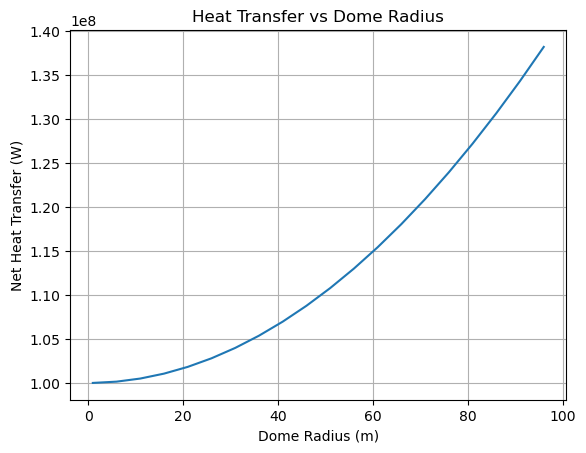

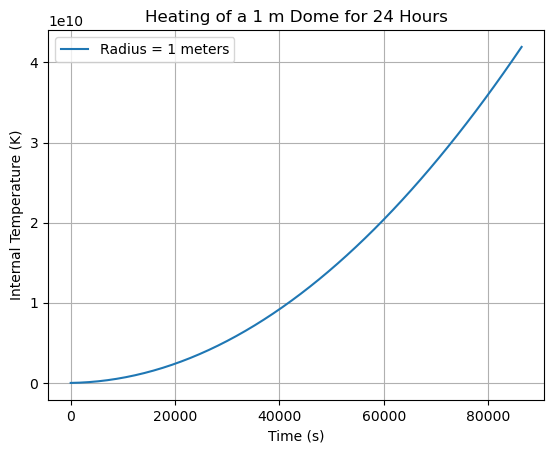

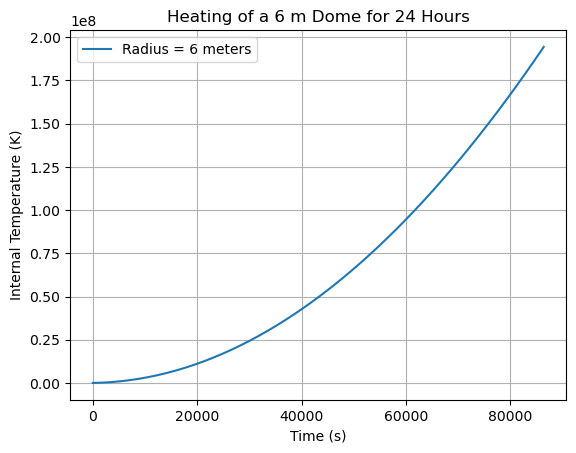

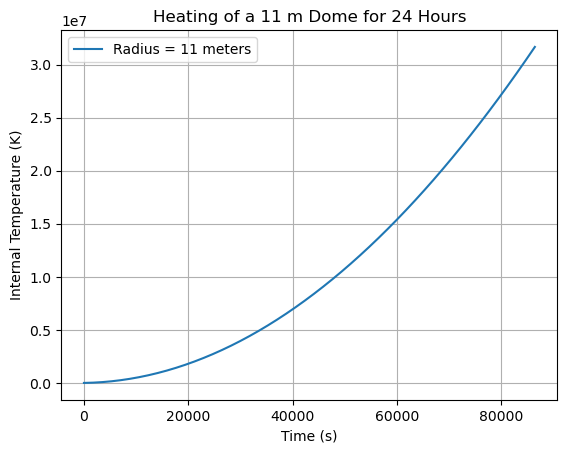

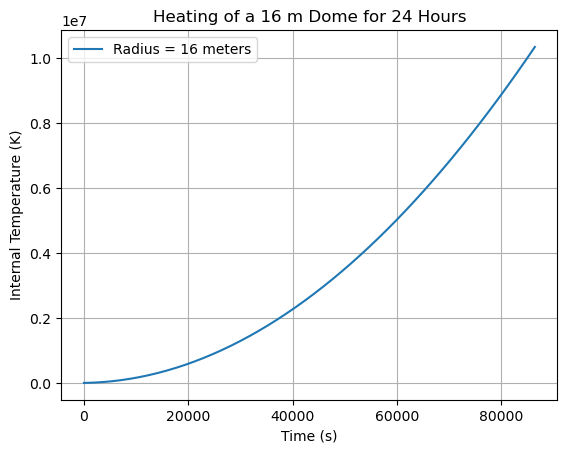

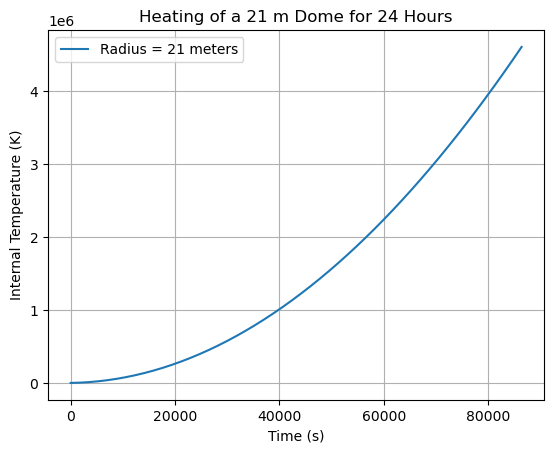

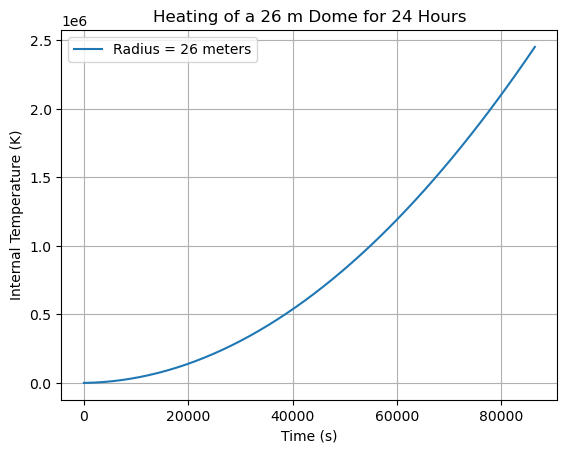

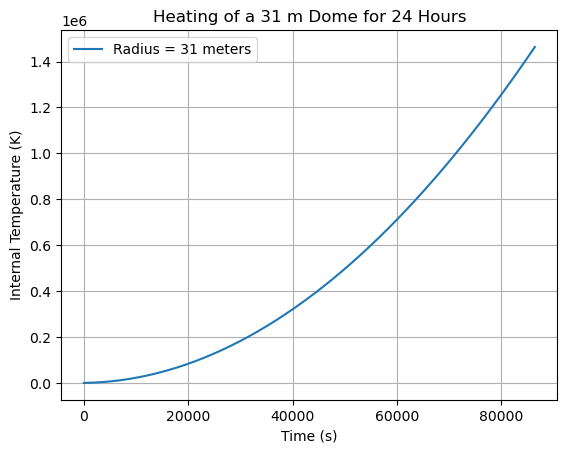

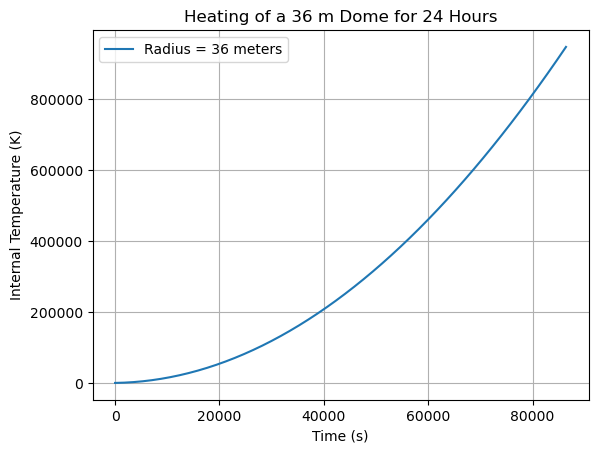

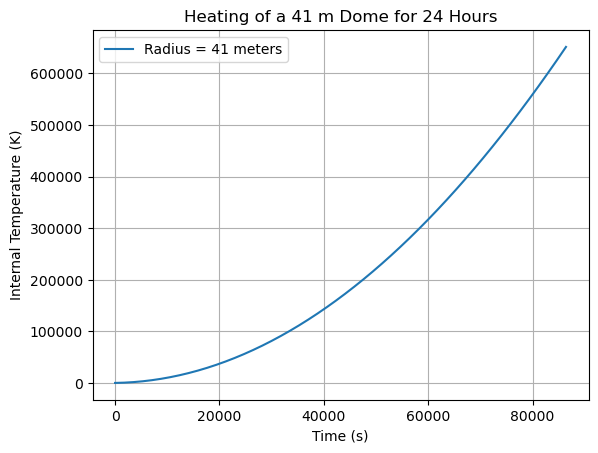

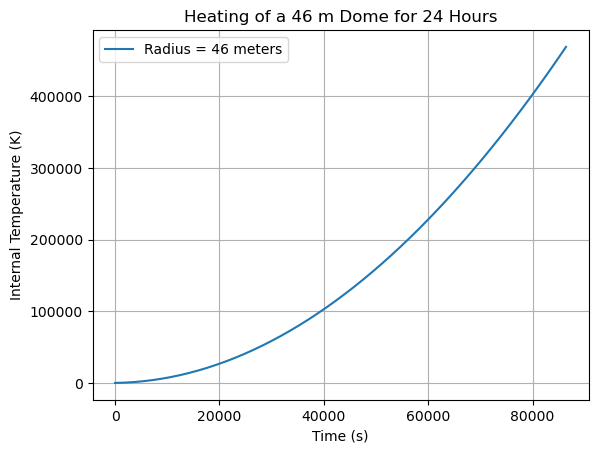

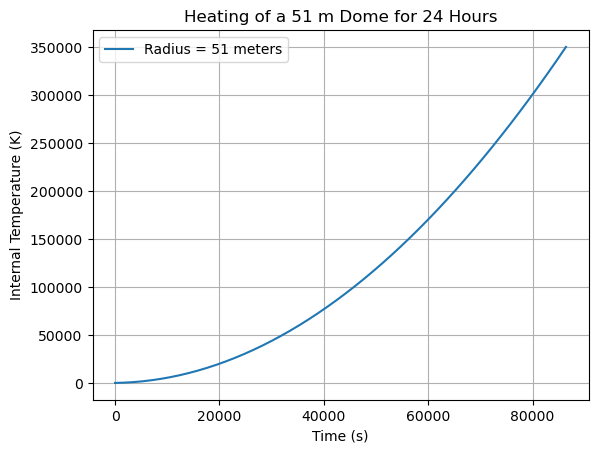

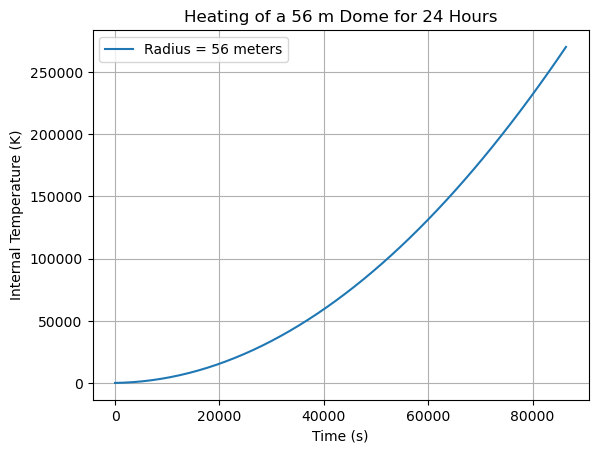

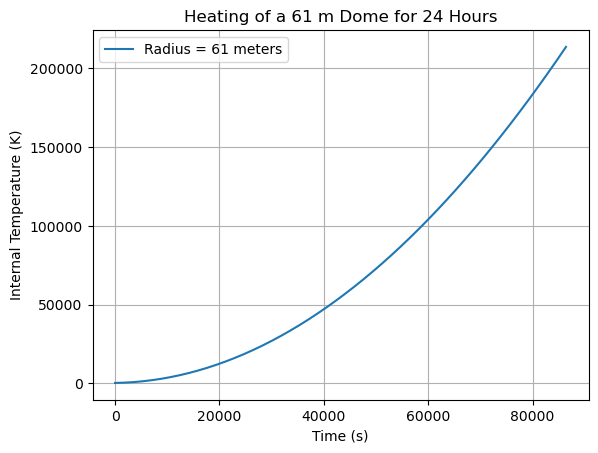

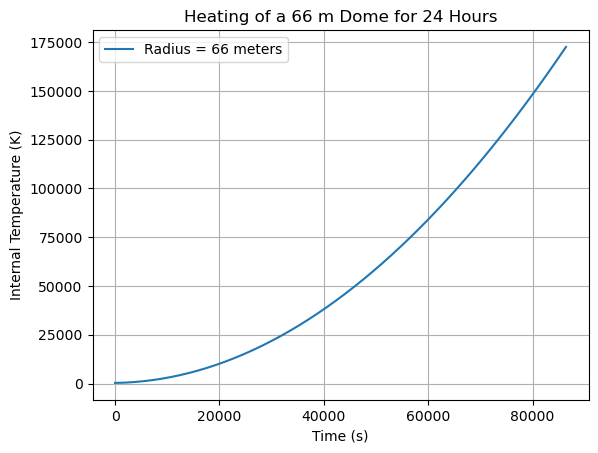

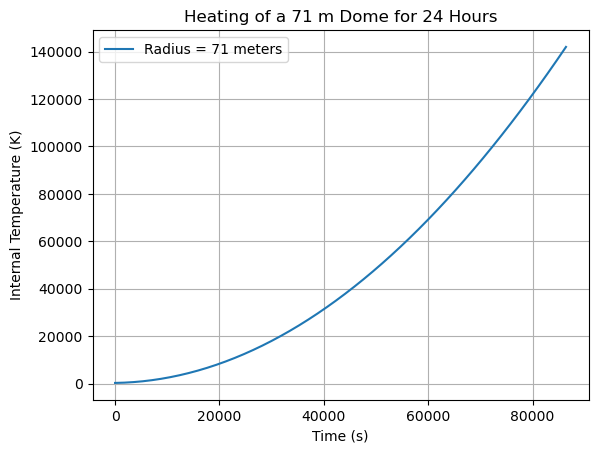

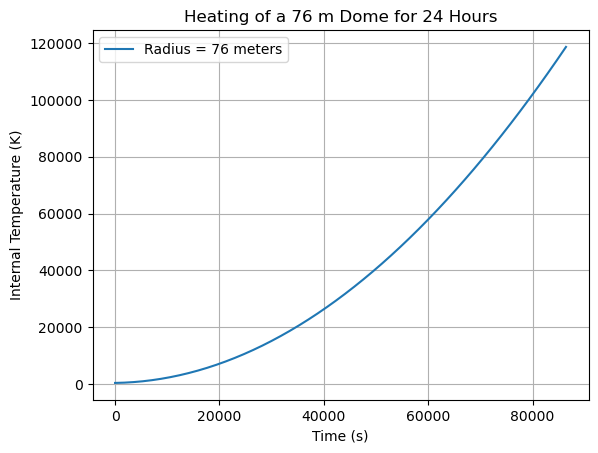

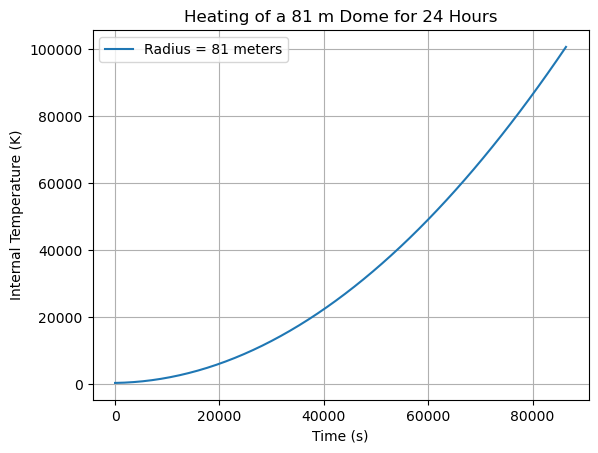

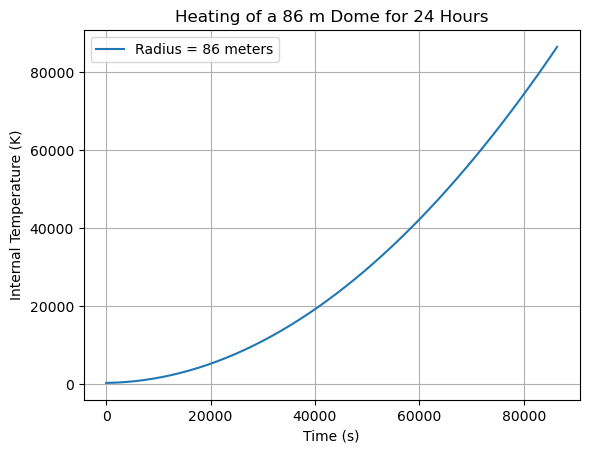

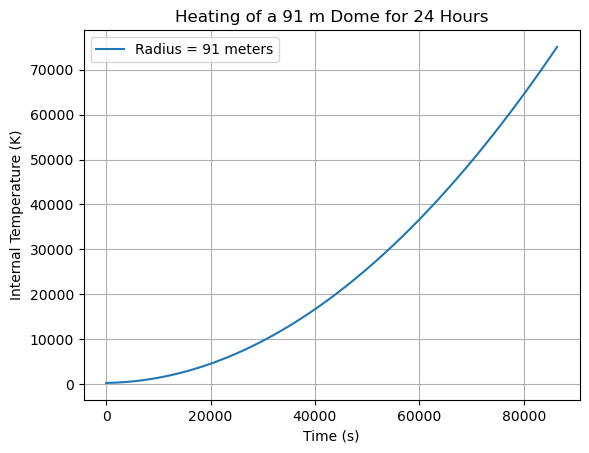

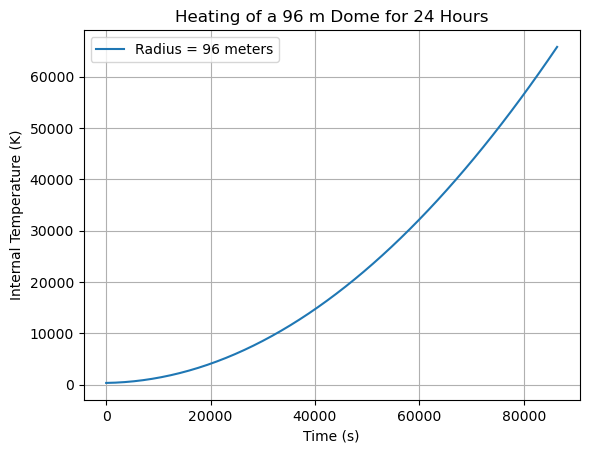

In [200]:
habitat = Sphere(10, EPSILON)
q_dot = habitat.total_heat_transfer();
print("heat transfer:", q_dot)

radii = []
q_dots = []
time = np.linspace(0, 60 * 60 * 24) # integrate with samples 1 second, for a whole day
internal_temperatures = []

for radius in range(1, 100, 5):
    dome = Sphere(radius, EPSILON)
    radii.append(radius)
    q_dots.append(dome.total_heat_transfer())

    temps = []
    for dt in time:
        dome.reup_internal_temperature(dt)
        temps.append(dome.internal_temperature)
    internal_temperatures.append(temps)

mp.figure()
mp.plot(radii, q_dots)
mp.title("Heat Transfer vs Dome Radius")
mp.xlabel("Dome Radius (m)")
mp.ylabel("Net Heat Transfer (W)")
mp.grid(True)
mp.show()
for i, r in enumerate(radii):
    mp.figure()
    mp.plot(time, internal_temperatures[i], label=f'Radius = {r} meters')
    mp.title(f'Heating of a {r} m Dome for 24 Hours')
    mp.xlabel("Time (s)")
    mp.ylabel("Internal Temperature (K)")
    mp.legend()
    mp.grid(True)
    mp.show()
